# 13 Визуализация данных
## 13.3 Знакомство с новыми данными


In [2]:
import pandas as pd


In [3]:
covid = pd.read_csv('data/covid_data.csv')
display(covid.head(5))

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [4]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              42795 non-null  object 
 1   date                                 42795 non-null  object 
 2   total_vaccinations                   23457 non-null  float64
 3   people_vaccinated                    22371 non-null  float64
 4   people_vaccinated_per_hundred        22371 non-null  float64
 5   people_fully_vaccinated              19462 non-null  float64
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64
 7   daily_vaccinations                   42558 non-null  float64
 8   vaccines                             42795 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.9+ MB


None

In [5]:
covid = covid.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [6]:
covid['date'] = pd.to_datetime(covid['date'])

In [7]:
covid['active']= covid['confirmed'] - covid['deaths'] - covid['recovered']

In [8]:
covid = covid.sort_values(['country', 'date'])
covid['daily_confirmed'] = covid.groupby('country')['confirmed'].diff()
covid['daily_deaths'] = covid.groupby('country')['deaths'].diff()
covid['daily_recovered'] = covid.groupby('country')['recovered'].diff()
display(covid)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [10]:
vaccinations_data['date'].describe()

C:\Users\Павел\AppData\Local\Temp\ipykernel_2456\2727065807.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vaccinations_data['date'].describe()


count                   42795
unique                    279
top       2021-06-30 00:00:00
freq                      216
first     2020-12-02 00:00:00
last      2021-09-06 00:00:00
Name: date, dtype: object

In [11]:
covid_df = covid.merge(vaccinations_data, on=['country', 'date'],how='left')
print(covid_df.shape[1])
print(covid_df.shape[0])

16
86785


In [12]:
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed'] * 100

In [13]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

In [14]:
covid_df.head()


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## 13.4 Графические возможности *Pandas*


<AxesSubplot: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='date'>

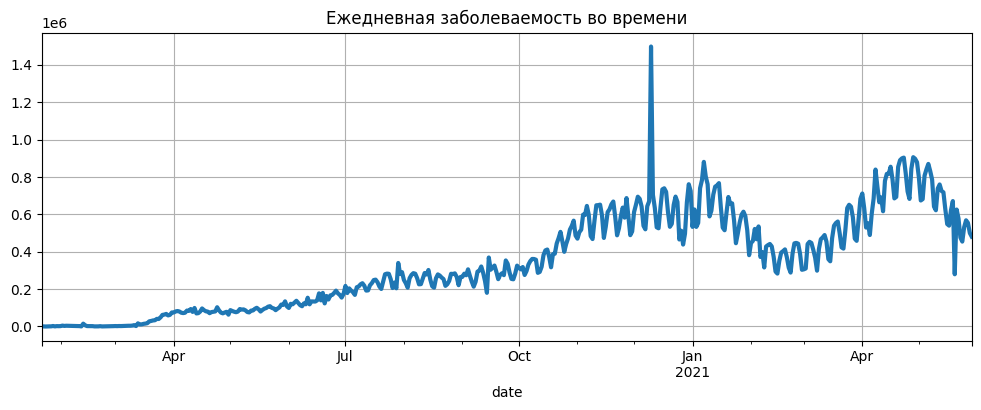

In [15]:
group_cases = covid_df.groupby('date')['daily_confirmed'].sum()
group_cases.plot(
    kind='line',
    figsize=(12,4),
    grid=True,
    title='Ежедневная заболеваемость во времени',
    lw=3
)


<AxesSubplot: title={'center': 'Распределение еждневной заболеваемости'}, ylabel='Frequency'>

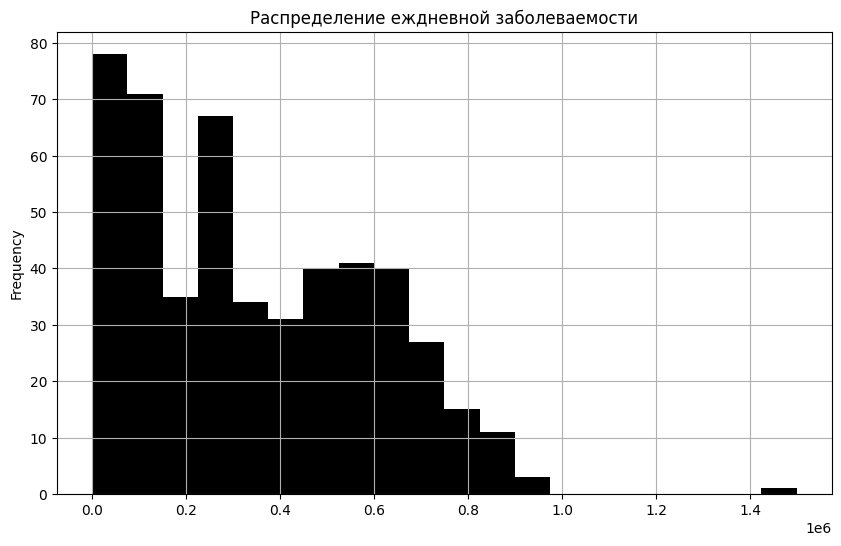

In [16]:
from turtle import color


group_cases.plot(
    kind='hist',
    figsize=(10,6),
    title='Распределение еждневной заболеваемости',
    grid=True,
    color='Black',
    bins=20
)

<AxesSubplot: xlabel='country'>

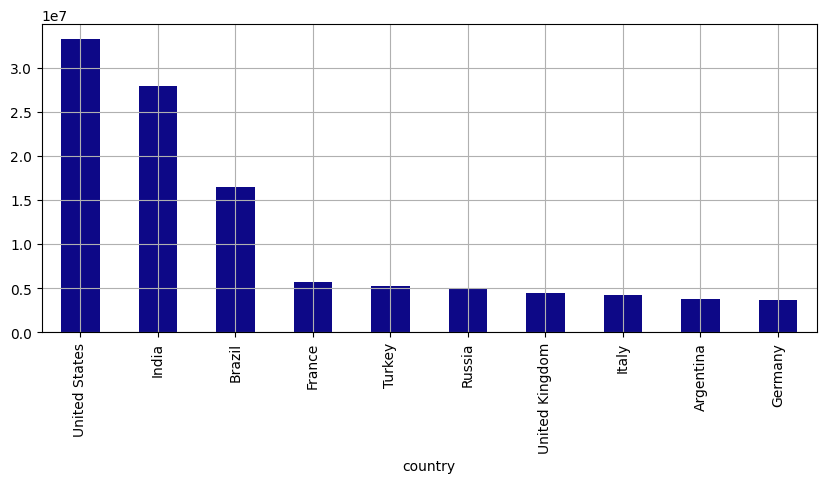

In [17]:
grouped_country = covid_df.groupby('country')['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(10,4),
    colormap='plasma'
)

<AxesSubplot: xlabel='country'>

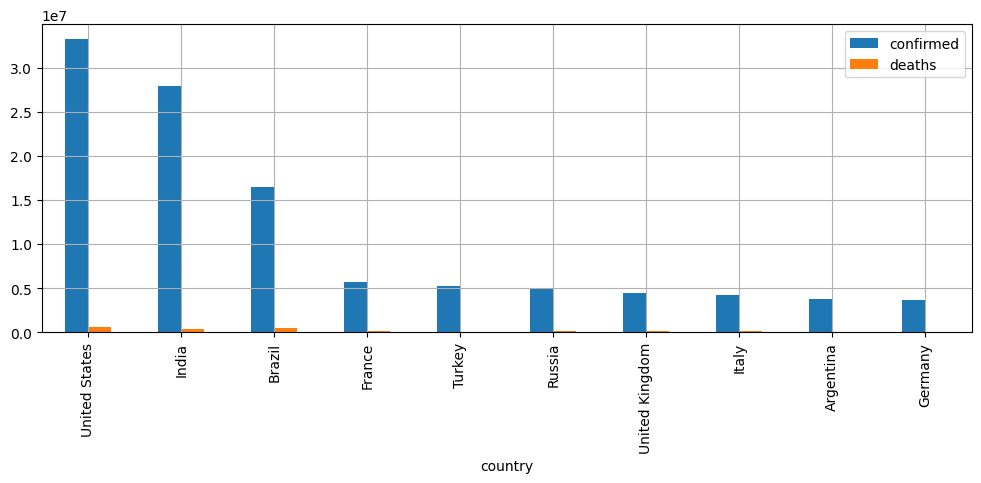

In [18]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
)

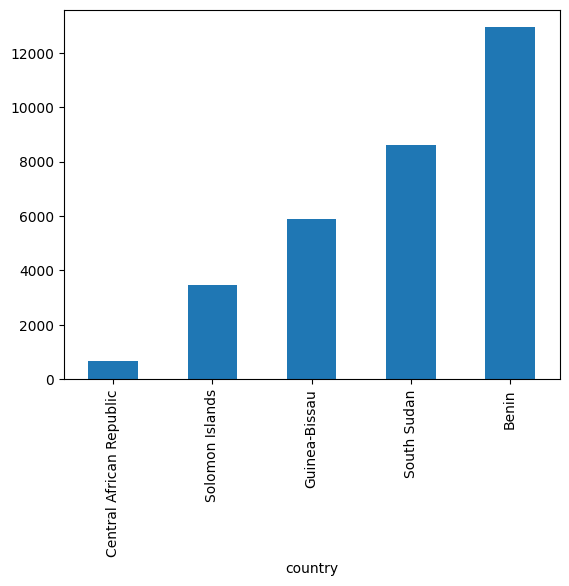

In [19]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

## 13.5 Графические возможности *Matplotlib*

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# что бф на темной теме графикк отображался коректо =>
plt.style.use('default')

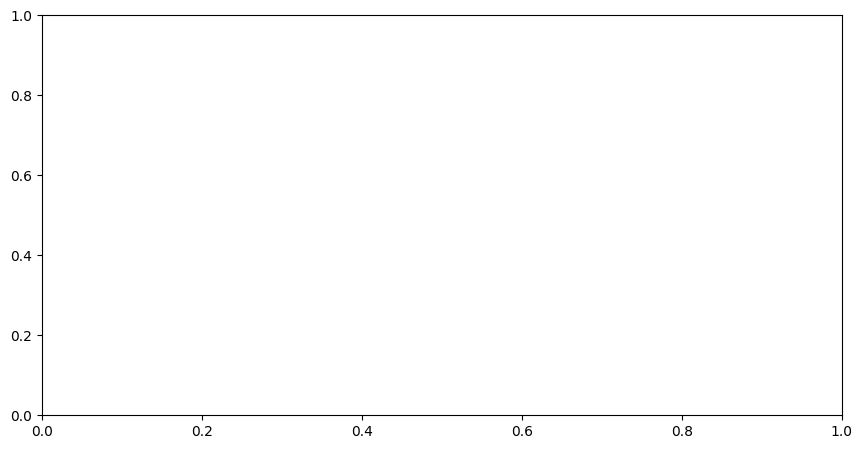

In [22]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0, 0, 1, 1])

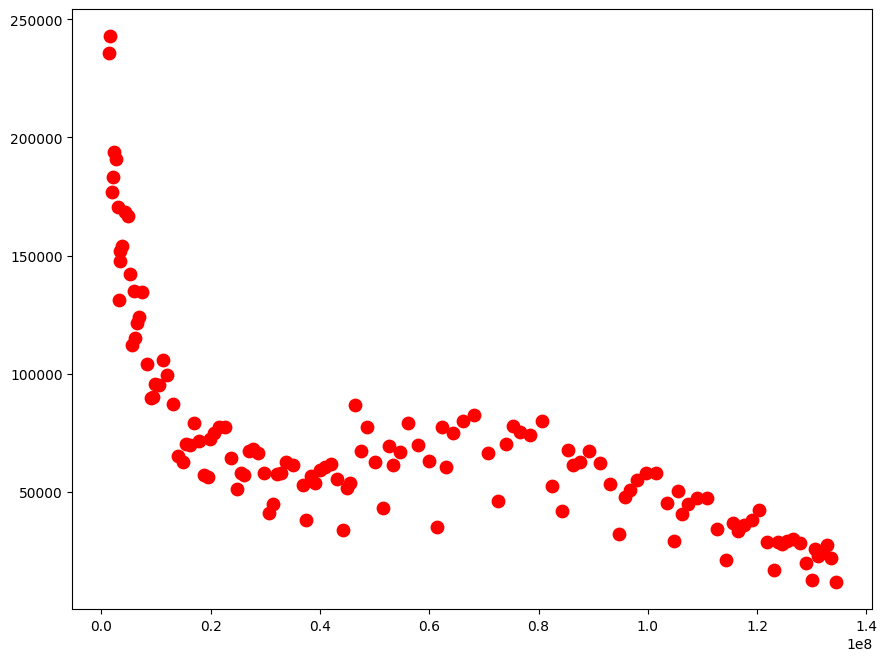

In [23]:
us_data = covid_df[covid_df['country'] == 'United States']
fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y= us_data['daily_confirmed'],
    s= 80,
    marker='o',
    c='red'
)

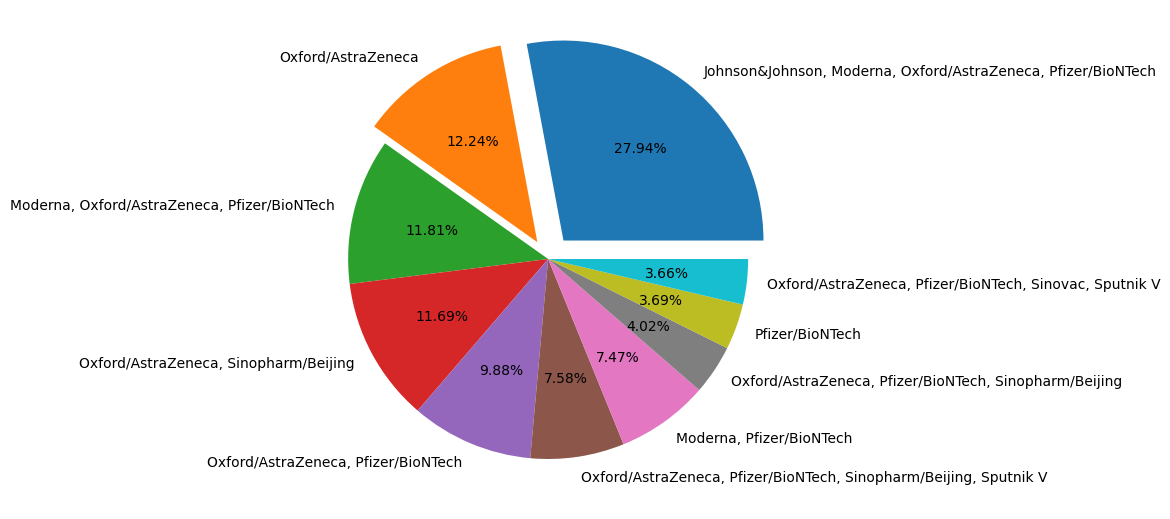

In [24]:
vaccin_combination = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes= fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccin_combination,
    labels= vaccin_combination.index,
    autopct='%.2f%%',
    explode=[0.12, 0.1, 0, 0, 0, 0, 0, 0, 0, 0]
);

### Преобразуем данный график к реалям по странам и каждую вакцину

In [25]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

In [26]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

In [27]:
vaccines_dict = {}
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

In [28]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['others'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
display(vaccines)

Oxford/AstraZeneca    149
Pfizer/BioNTech       102
Sinopharm/Beijing      66
Moderna                58
SputnikV               48
Johnson&Johnson        45
Sinovac                39
others                 24
dtype: int64

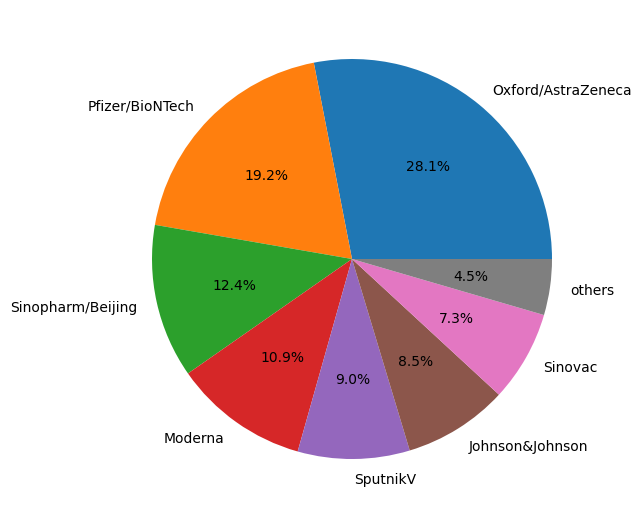

In [29]:
# строим круговую дл сортированного Series
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

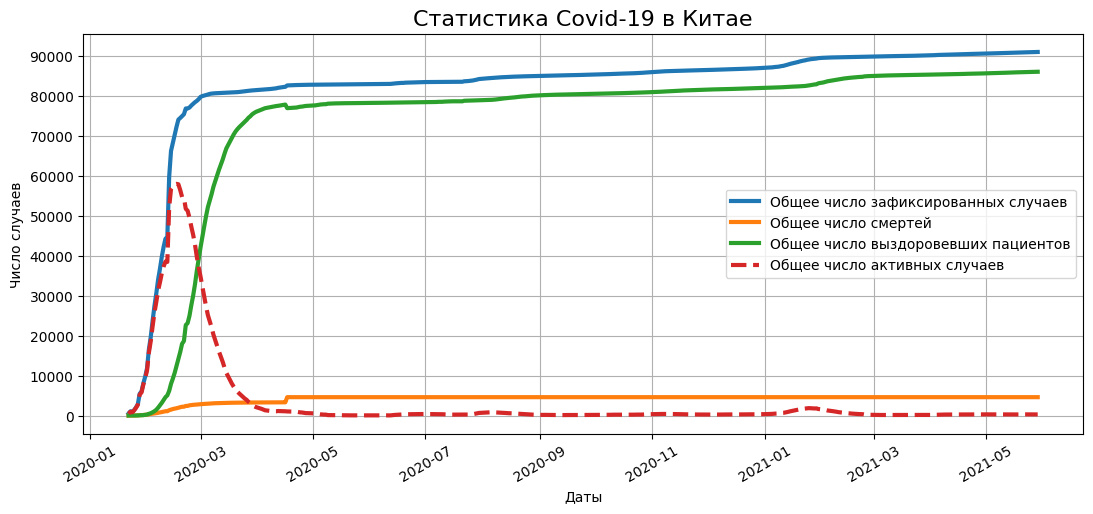

In [30]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

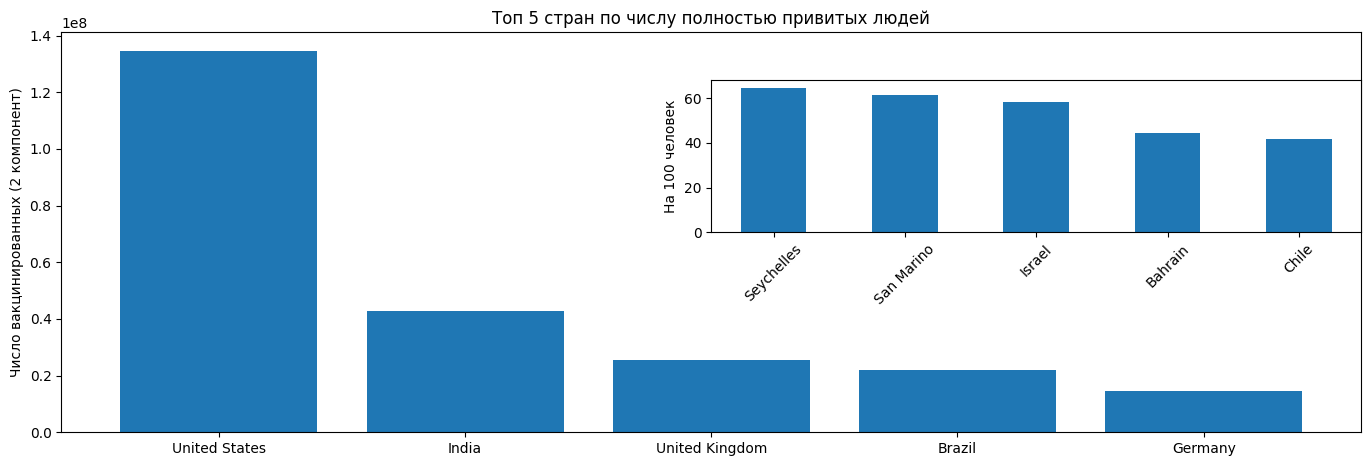

In [31]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.5, 0.5, 0.5, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

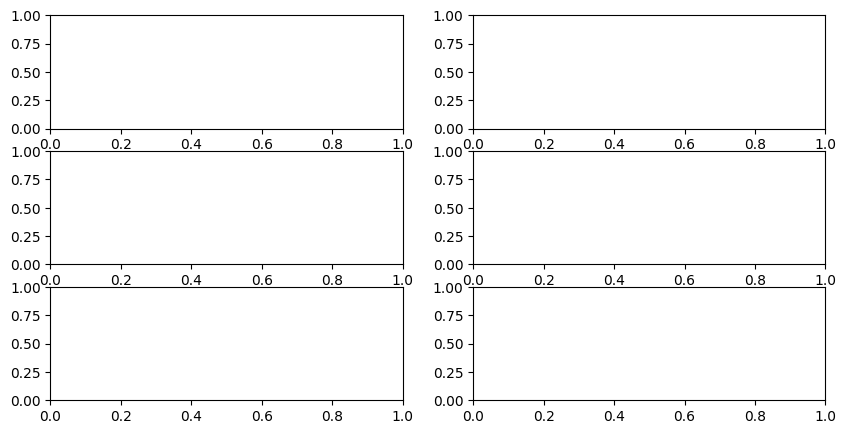

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))

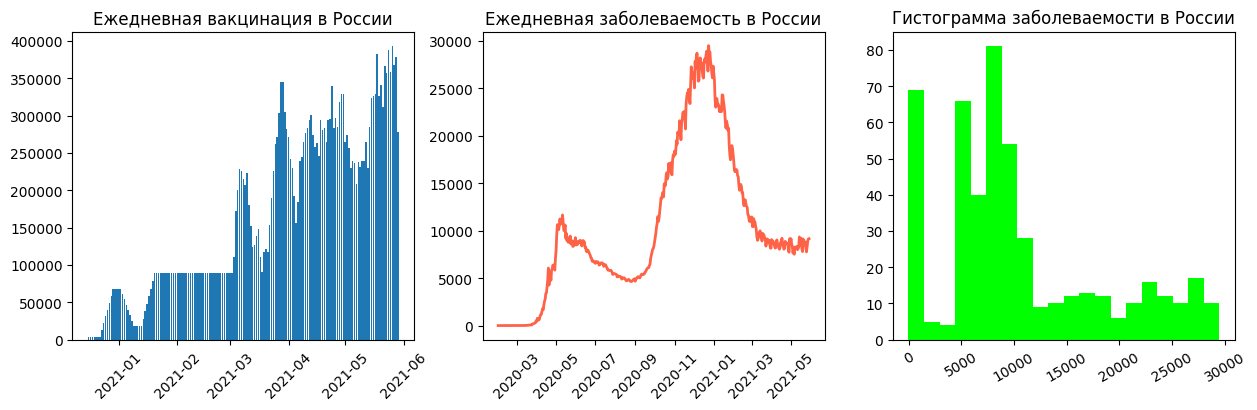

In [33]:
russia_data = covid_df[covid_df['country']== 'Russia']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].bar(
    x=russia_data['date'],
    height=russia_data['daily_vaccinations'],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

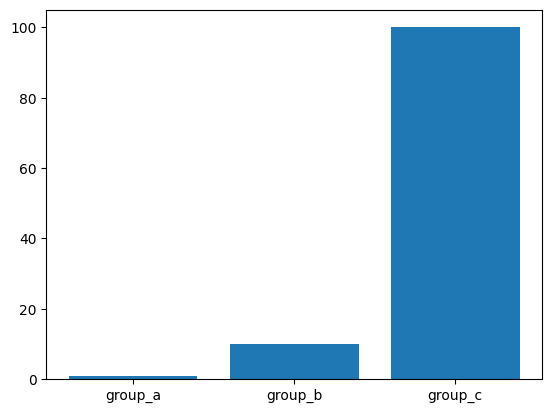

In [34]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

## 13.6 Графические возможности библиотеки *Seaborn*

In [35]:
import seaborn as sns

In [36]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

population = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(population, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


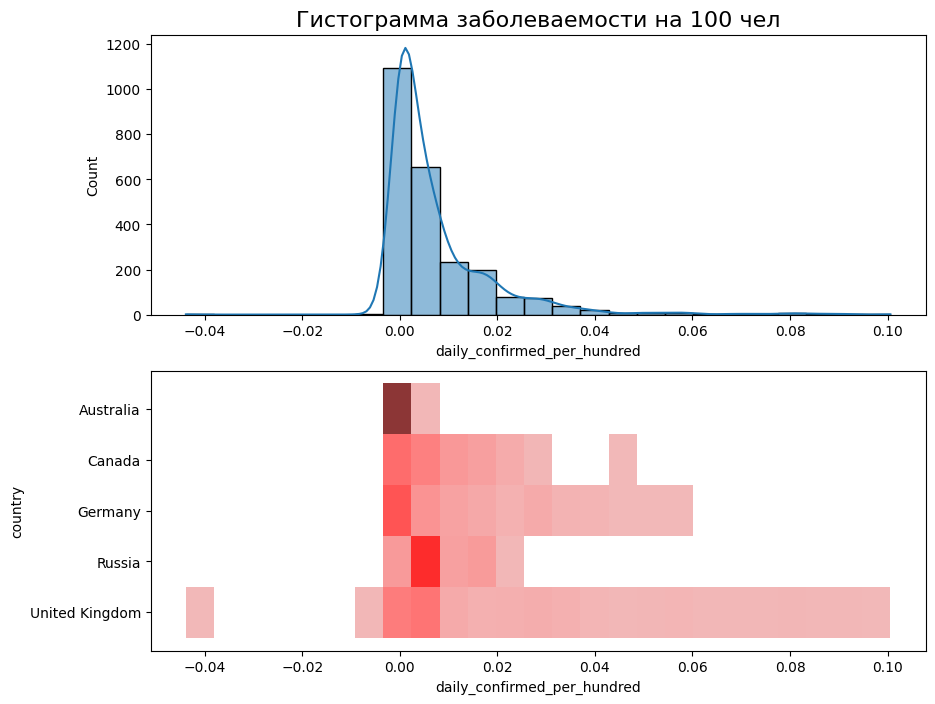

In [37]:
fig, axes = plt.subplots(nrows=2, ncols= 1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма заболеваемости на 100 чел', fontsize=16)
sns.histplot(
    data = croped_covid_df,
    x = 'daily_confirmed_per_hundred',
    y = 'country',
    bins=25,
    color='red',
    ax=axes[1]
);

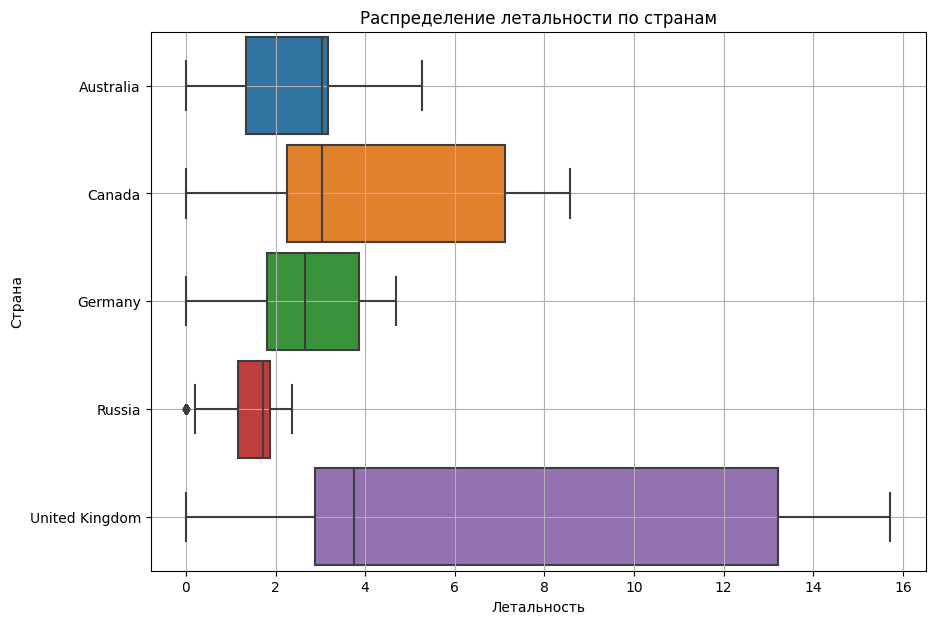

In [38]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data = croped_covid_df,
    y = 'country',
    x = 'death_rate',
    width=0.9,
    orient='h'
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

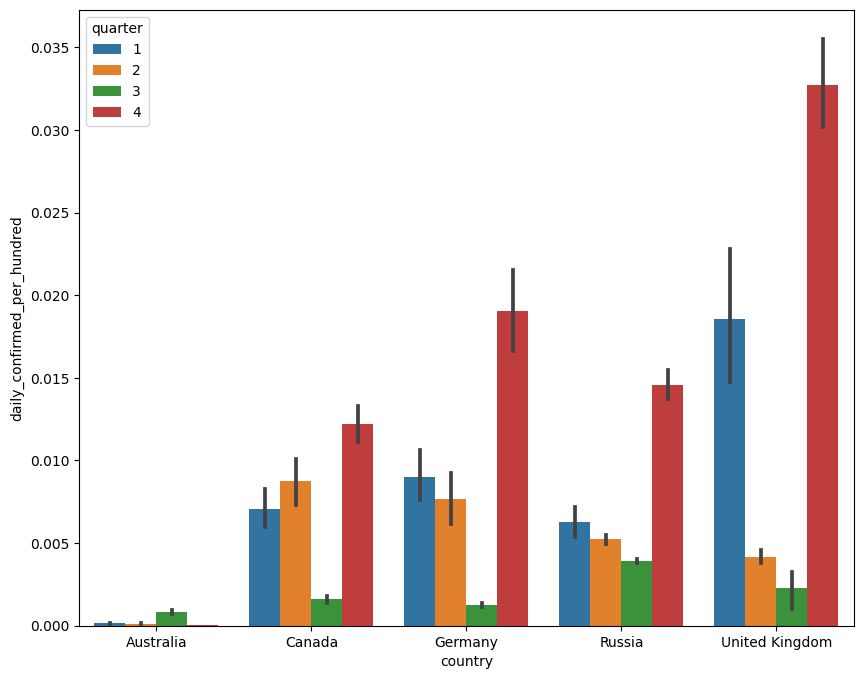

In [39]:
fig = plt.figure(figsize=(10, 8))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data= croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)

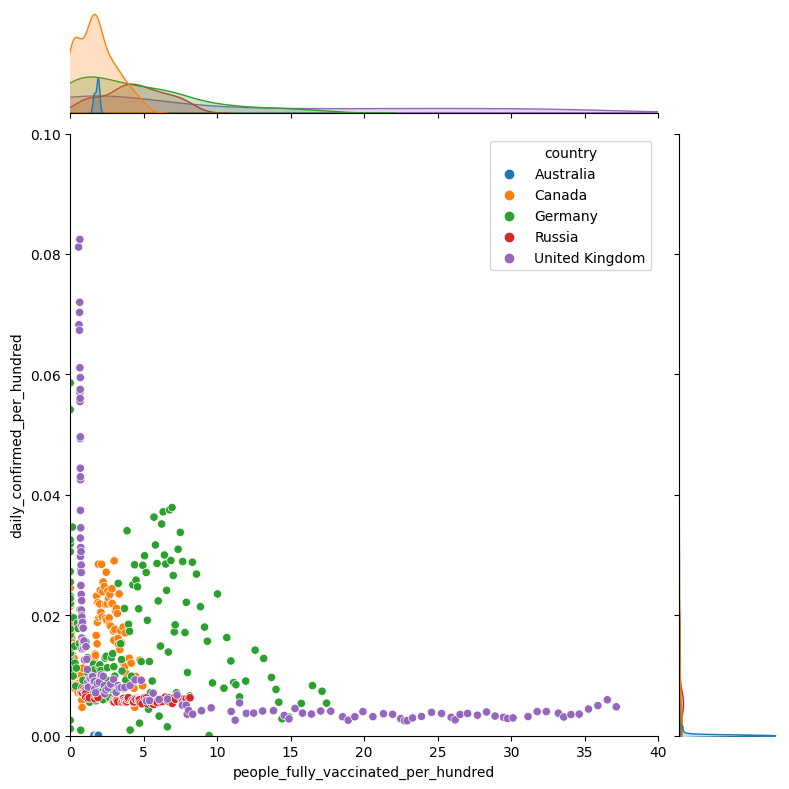

In [40]:
joinplot = sns.jointplot(
    data=croped_covid_df,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    xlim=(0, 40),
    ylim=(0, 0.1),
    height=8,
    hue='country'
);

In [41]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Text(0.5, 1.0, 'Тепловая карта по датам')

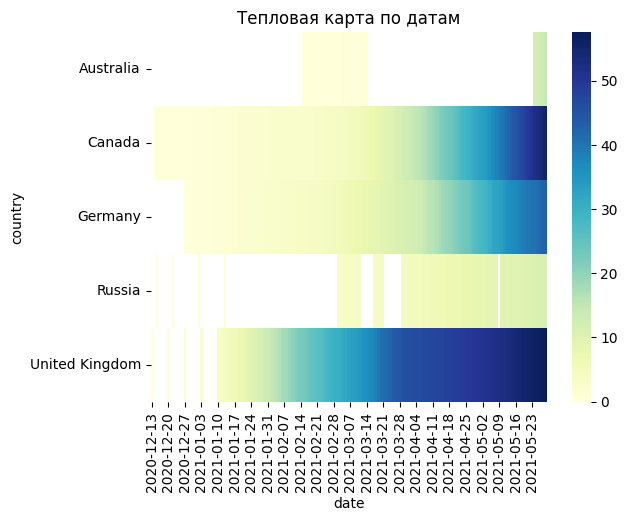

In [42]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта по датам')

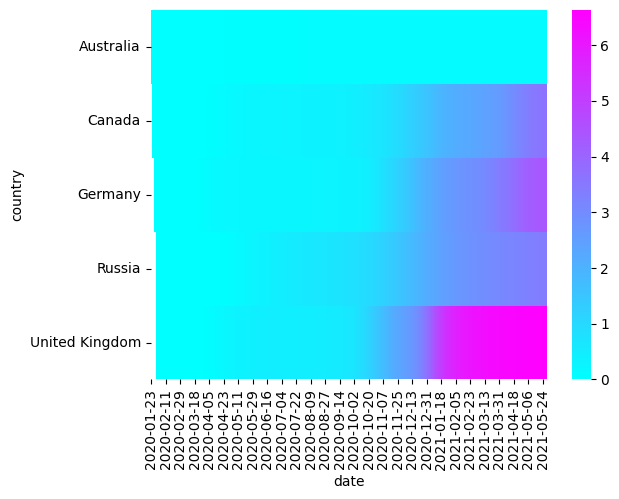

In [43]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population']*100
pivot_1 = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    index='country',
    columns='date'
)
pivot_1.columns = pivot_1.columns.astype('string')
heatmap_1 = sns.heatmap(data=pivot_1, cmap='cool')

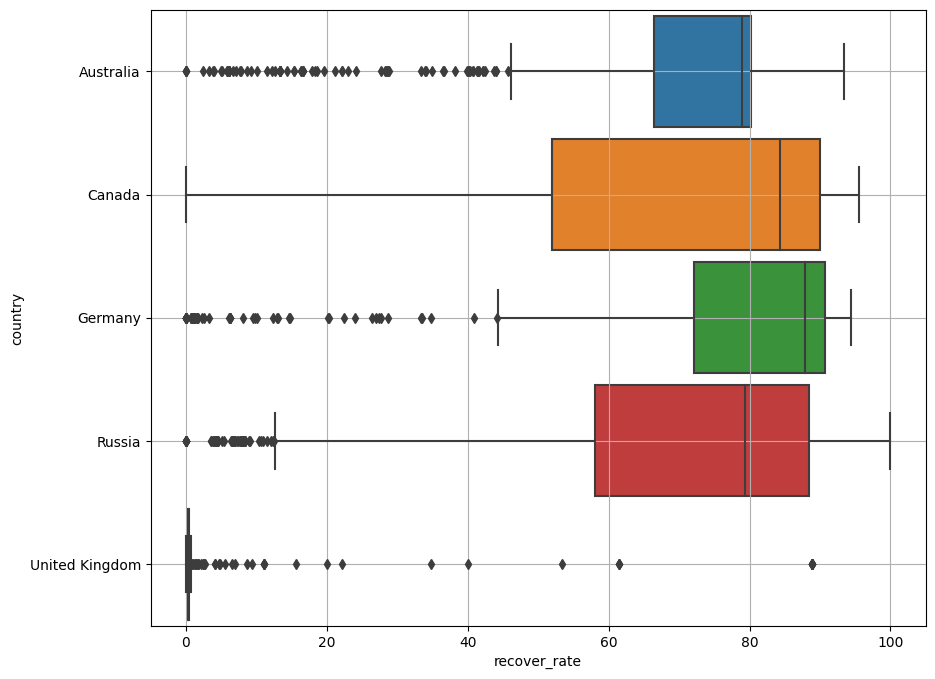

In [44]:
fig = plt.figure(figsize=(10,8))
box = sns.boxplot(
    data=croped_covid_df,
    x='recover_rate',
    y='country',
    width=0.9
)
box.grid()

## 13.7 Графические возможности *Plotly*

In [45]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.10.0


In [46]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data,
    x='date',
    y=['confirmed', 'recovered', 'deaths', 'active'],
    height=500,
    width=700,
    title='Confirmed, Recovered, Deaths, Active cases over Time'
)
fig.show()